In [2]:
import xarray as xr

In [67]:
era5 = xr.open_zarr(
    'gs://weatherbench2/datasets/era5/1959-2022-1h-360x181_equiangular_with_poles_conservative.zarr',
    chunks={'time': 48},
    consolidated=True,
    )
print("Model surface dataset size {} GiB".format(era5.nbytes/(1024**3)))
era5

Model surface dataset size 31235.175951734185 GiB


<xarray.Dataset> Size: 34TB
Dimensions:                                           (time: 552264,
                                                       longitude: 360,
                                                       latitude: 181, level: 37)
Coordinates:
  * latitude                                          (latitude) float64 1kB ...
  * level                                             (level) int64 296B 1 .....
  * longitude                                         (longitude) float64 3kB ...
  * time                                              (time) datetime64[ns] 4MB ...
Data variables: (12/31)
    10m_u_component_of_wind                           (time, longitude, latitude) float32 144GB dask.array<chunksize=(48, 360, 181), meta=np.ndarray>
    10m_v_component_of_wind                           (time, longitude, latitude) float32 144GB dask.array<chunksize=(48, 360, 181), meta=np.ndarray>
    2m_temperature                                    (time, longitude, latitude) float32 144GB dask.array<chunksize=(48, 360, 181), meta=np.ndarray>
    angle_of_sub_gridscale_orography                  (longitude, latitude) float32 261kB dask.array<chunksize=(360, 181), meta=np.ndarray>
    anisotropy_of_sub_gridscale_orography             (longitude, latitude) float32 261kB dask.array<chunksize=(360, 181), meta=np.ndarray>
    geopotential                                      (time, level, longitude, latitude) float32 5TB dask.array<chunksize=(48, 37, 360, 181), meta=np.ndarray>
    ...                                                ...
    total_precipitation                               (time, longitude, latitude) float32 144GB dask.array<chunksize=(48, 360, 181), meta=np.ndarray>
    type_of_high_vegetation                           (longitude, latitude) float32 261kB dask.array<chunksize=(360, 181), meta=np.ndarray>
    type_of_low_vegetation                            (longitude, latitude) float32 261kB dask.array<chunksize=(360, 181), meta=np.ndarray>
    u_component_of_wind                               (time, level, longitude, latitude) float32 5TB dask.array<chunksize=(48, 37, 360, 181), meta=np.ndarray>
    v_component_of_wind                               (time, level, longitude, latitude) float32 5TB dask.array<chunksize=(48, 37, 360, 181), meta=np.ndarray>
    vertical_velocity                                 (time, level, longitude, latitude) float32 5TB dask.array<chunksize=(48, 37, 360, 181), meta=np.ndarray>

In [68]:
recent_an = era5.sel(time=slice('2020-01-01', '2021-01-01'))

recent_an = recent_an.sel(time='2020-10-31T18')
recent_an

<xarray.Dataset> Size: 64MB
Dimensions:                                           (longitude: 360,
                                                       latitude: 181, level: 37)
Coordinates:
  * latitude                                          (latitude) float64 1kB ...
  * level                                             (level) int64 296B 1 .....
  * longitude                                         (longitude) float64 3kB ...
    time                                              datetime64[ns] 8B 2020-...
Data variables: (12/31)
    10m_u_component_of_wind                           (longitude, latitude) float32 261kB dask.array<chunksize=(360, 181), meta=np.ndarray>
    10m_v_component_of_wind                           (longitude, latitude) float32 261kB dask.array<chunksize=(360, 181), meta=np.ndarray>
    2m_temperature                                    (longitude, latitude) float32 261kB dask.array<chunksize=(360, 181), meta=np.ndarray>
    angle_of_sub_gridscale_orography                  (longitude, latitude) float32 261kB dask.array<chunksize=(360, 181), meta=np.ndarray>
    anisotropy_of_sub_gridscale_orography             (longitude, latitude) float32 261kB dask.array<chunksize=(360, 181), meta=np.ndarray>
    geopotential                                      (level, longitude, latitude) float32 10MB dask.array<chunksize=(37, 360, 181), meta=np.ndarray>
    ...                                                ...
    total_precipitation                               (longitude, latitude) float32 261kB dask.array<chunksize=(360, 181), meta=np.ndarray>
    type_of_high_vegetation                           (longitude, latitude) float32 261kB dask.array<chunksize=(360, 181), meta=np.ndarray>
    type_of_low_vegetation                            (longitude, latitude) float32 261kB dask.array<chunksize=(360, 181), meta=np.ndarray>
    u_component_of_wind                               (level, longitude, latitude) float32 10MB dask.array<chunksize=(37, 360, 181), meta=np.ndarray>
    v_component_of_wind                               (level, longitude, latitude) float32 10MB dask.array<chunksize=(37, 360, 181), meta=np.ndarray>
    vertical_velocity                                 (level, longitude, latitude) float32 10MB dask.array<chunksize=(37, 360, 181), meta=np.ndarray>

In [69]:
recent_an.latitude.shape
recent_an['2m_temperature'].shape

(360, 181)

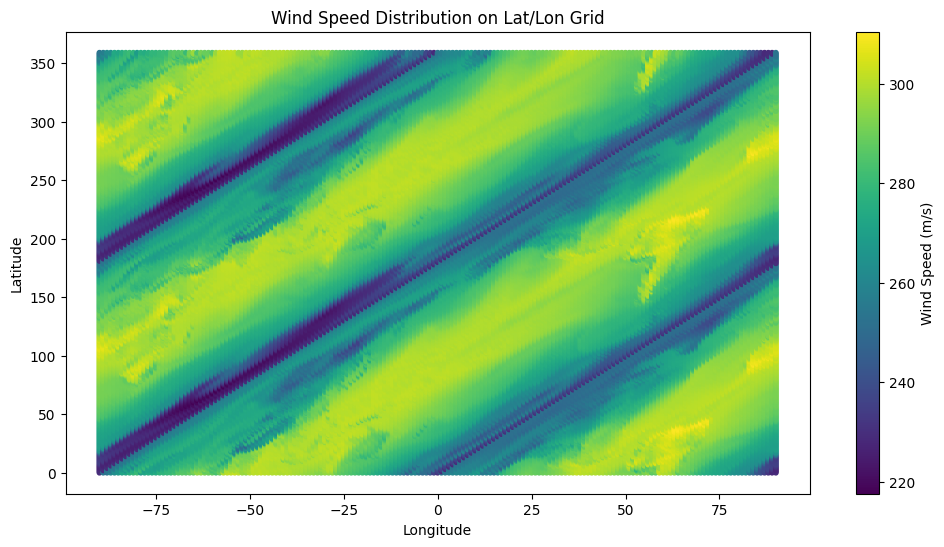

In [73]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

# Create a meshgrid for latitude and longitude
lon_grid, lat_grid = np.meshgrid(recent_an.longitude, recent_an.latitude)

# Flatten the grids and wind speed data for scatter plot
lon_flat = lon_grid.flatten()
lat_flat = lat_grid.flatten()
wind_speed_flat = recent_an['2m_temperature'].values.flatten()

plt.figure(figsize=(12, 6))
# plt.axes(projection=ccrs.PlateCarree())
plt.scatter(
    lat_flat,
    lon_flat, 
    c=wind_speed_flat,
    s=10
)
plt.colorbar(label='Wind Speed (m/s)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Wind Speed Distribution on Lat/Lon Grid')
plt.show()